In [1]:
from zget_data import get_responses, get_qdetails, get_questions, get_design, page_map, quest_map, attention, did_map
import pandas as pd
import json
import seaborn as sns

In [2]:
password_response, time_response, survey_response = get_responses(4)

Total: 26


## Password Analysis

In [3]:
pd.DataFrame(password_response)
# password_response.head(5)

,password2,password2_recall2,password2_recall1,password2_recall3
0,Chevy68#,NaN,NaN,NaN
1,igahot6844$,NaN,NaN,NaN
2,ihtwtbmftn5d,ihtwtn5dbmaw,ihtwtn5dbmaw,ihtwtn5dowbmaw
3,IlTvA#a$S,NaN,NaN,NaN
4,987654321,NaN,NaN,NaN
5,aiw9h,NaN,NaN,NaN
6,Itmttsaid62#,NaN,NaN,NaN
7,ad%456lk@15,NaN,NaN,NaN
8,idosath$,NaN,idostah$,NaN
9,Iwtcci2!,NaN,NaN,NaN


## Time Analysis

,startstudy,fpasssurvey,pagegif,desinint,quest,csquest,motivation,spass,scog,spasssurvey,spassrecall,demo,total (mins)
0,3.005,14.405,8.269,28.876,71.381,263.868,5.077,94.804,15.165,45.252,13.180,50.644,10.232100
1,47.552,27.253,9.852,122.930,47.599,223.082,24.884,69.051,16.381,40.184,21.445,95.529,12.429033
2,5.375,494.552,8.896,52.800,33.263,115.351,8.119,51.151,12.215,34.440,56.399,40.191,15.212533
3,6.221,19.314,7.765,98.463,43.673,228.898,18.713,79.684,39.493,41.361,26.663,74.036,11.404733
4,65.899,13.170,3.281,5.146,28.092,233.129,3.441,21.001,6.256,23.962,10.425,27.825,7.360450


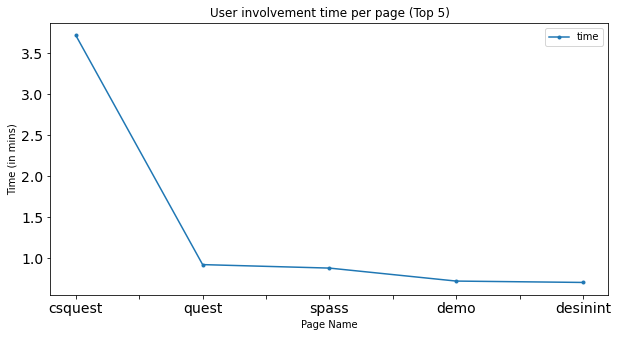

In [4]:
page_time_df = pd.DataFrame(time_response)
page_time_df = page_time_df.sort_index(axis=1, key=lambda x: x.astype(int))
page_time_df = page_time_df.rename(page_map, axis=1)
page_time_df['total (mins)'] = page_time_df.sum(axis=1)/60
display(page_time_df.head())

# top 5 pages with higher time
top5 = pd.DataFrame(columns=['page', 'time'])
for i, data in page_time_df.median().div(60).sort_values(ascending=False).head(5).items():
    top5 = pd.concat([top5, pd.DataFrame([[i, data]], columns=top5.columns)])

_ = top5.plot(x='page', y='time', figsize=(10, 5), xlabel="Page Name", ylabel="Time (in mins)", title="User involvement time per page (Top 5)", fontsize=14, style=".-")

## Survey Response Analysis

In [5]:
survey_response_df = pd.DataFrame(survey_response)

### Quest

In [6]:
normqsid = ['1-2', '1-4', '1-7', '1-10', '1-12', '1-13', '1-16']
quest = pd.DataFrame(survey_response_df['7'].to_dict()).astype(int)
quest.drop(attention.get('7'), inplace=True)
normquest = 8 - quest.loc[normqsid]
quest.update(normquest)

# normalize scale 1 to 8 to scale -3 to 3
quest = quest - 4
quest.update(quest)

new_index = {}
for qsid in quest.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('7', qsid).replace("'", '"')).get('elements').get(likert_scale)
new_index
quest = quest.rename(new_index)
quest['mean'] = quest.mean(axis=1)
quest['median'] = quest.median(axis=1)
quest['STD'] = quest.std(axis=1)

quest

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,mean,median,STD
structured,2.0,1.0,2.0,1.0,0.0,1.0,2.0,3.0,2.0,2.0,...,3.0,1.0,2.0,2.0,3.0,3.0,3.0,2.038462,2.000000,0.792627
rewarding,2.0,2.0,2.0,0.0,-1.0,1.0,2.0,3.0,2.0,2.0,...,3.0,0.0,2.0,2.0,2.0,3.0,1.0,1.653846,2.000000,1.305262
helpful,2.0,2.0,3.0,1.0,1.0,1.0,3.0,2.0,2.0,3.0,...,3.0,0.0,2.0,2.0,3.0,3.0,3.0,2.115385,2.000000,0.874890
well grouped,2.0,2.0,3.0,1.0,3.0,1.0,3.0,1.0,2.0,3.0,...,3.0,1.0,3.0,2.0,2.0,3.0,2.0,2.153846,2.000000,0.802945
organized,3.0,1.0,3.0,1.0,2.0,1.0,3.0,2.0,2.0,2.0,...,3.0,0.0,3.0,2.0,3.0,3.0,2.0,2.076923,2.000000,0.857470
beneficial,2.0,2.0,3.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0,...,3.0,1.0,2.0,0.0,3.0,3.0,2.0,1.884615,2.000000,1.133116
ordered,2.0,1.0,3.0,1.0,-3.0,1.0,3.0,1.0,2.0,2.0,...,3.0,1.0,2.0,2.0,2.0,3.0,2.0,1.692308,2.000000,1.382828
appealing,2.0,2.0,2.0,0.0,1.0,0.0,1.0,2.0,2.0,2.0,...,3.0,0.0,2.0,0.0,3.0,3.0,1.0,1.692308,2.000000,1.011595
stylish,2.0,1.0,1.0,1.0,-2.0,0.0,1.0,2.0,1.0,1.0,...,3.0,-1.0,2.0,0.0,1.0,3.0,0.0,0.807692,1.000000,1.491633
understandable,3.0,2.0,3.0,2.0,1.0,1.0,3.0,2.0,2.0,3.0,...,3.0,1.0,3.0,1.0,3.0,3.0,3.0,2.307692,2.000000,0.710497


In [7]:
cats = {}
for k, v in quest_map.items():
    temp = quest.loc[v]
    cats[k] = temp

for k, v in cats.items():
    print(f'{k}: {v["mean"].mean()}')
    print(f'{k}: {v["STD"].std()}')
    print(10*'*')


Perspicuity: 1.9615384615384615
Perspicuity: 0.3526275200181111
**********
Aesthetics: 1.4326923076923077
Aesthetics: 0.23907586792463892
**********
Usefulness: 1.9134615384615383
Usefulness: 0.18727268034524971
**********
Clarity: 1.9903846153846154
Clarity: 0.2840022012338177
**********


### CSQuest

In [8]:
csquest = pd.DataFrame(survey_response_df['8'].to_dict())
qualindex = ['9-1', '11-1']
csquestqual = csquest.loc[qualindex]
# csquestqual.to_csv('qualitative/csquest_info.csv')
csquestqual

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
9-1,"[Social Media, Gaming Websites]",[Social Media],"[E-commerce Websites, Course Management Websit...","[Social Media, Email, Course Management Websit...","[Social Media, Financial Websites, E-commerce ...",[None of the above],"[Social Media, Gaming Websites, Course Managem...","[Social Media, Email, Financial Websites, E-co...","[Social Media, Email, Financial Websites, Test...","[Social Media, Gaming Websites, Course Managem...",...,[Social Media],[Social Media],"[Social Media, Email, Financial Websites, E-co...","[Social Media, Email, Financial Websites, E-co...","[Social Media, Email]","[Social Media, Email, Financial Websites, E-co...","[Social Media, Email, Financial Websites, Gove...","[Social Media, Email, Financial Websites, Gove...","[Social Media, Email, E-commerce Websites, Gov...","[Social Media, Email, Financial Websites, E-co..."
11-1,I think the design looks nice and it was well ...,I think the strategy if easy to follow but I t...,"Its good, useful and a good way to end up maki...",I think that it is interesting and would help ...,very nice presentation of this design,I think that the presentation of this design i...,"It is simple, understandable. Probably some ...",The presentation is very good and it is very e...,This was very interesting and something that I...,Overall the presentation is attractive and hel...,...,That was very clear and understandable. It use...,"Private memory, thought of it, first letters, ...",It is interesting and gets you involved. But i...,The presentation is very useful for me. Which ...,It is straight forward and to the point. I li...,to based upon design and password hint.,I think it is simple yet very informative. It ...,I liked the way it was informal and casual. It...,Clarity and coherence of the content.,I'm pretty certain that it will help me create...


In [9]:
csquestquant = csquest.drop(qualindex).fillna(0).astype(int)
csquestquant.drop(attention.get('8'), inplace=True)

normqsid = []
normcsquestquant = 8 - csquestquant.loc[normqsid]
csquestquant.update(normquest)

# normalize scale 1 to 8 to scale -3 to 3
csquestquant = csquestquant - 4
csquestquant.update(csquestquant)

# new_columns = {}
# for qsid in csquestquant.columns:
#     new_columns[qsid] = json.loads(get_qdetails(page_id, qsid).split('\n')[1].replace("'", '"')).get('keyword')
# csquestquant.rename(columns=new_columns, inplace=True)

new_index = {}
for qsid in csquestquant.index:
    new_index[qsid] = json.loads(get_qdetails('8', qsid).replace("'", '"').split('\n')[1]).get('keyword')
new_index
csquestquant = csquestquant.rename(new_index)
csquestquant['mean'] = csquestquant.mean(axis=1)
csquestquant['median'] = csquestquant.median(axis=1)
csquestquant['STD'] = csquestquant.std(axis=1)

csquestquant

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,mean,median,STD
Stimulation,2.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,2.0,2.0,...,3.0,0.0,3.0,3.0,0.0,1.0,2.0,1.692308,2.000000,0.935508
Trust,2.0,2.0,3.0,1.0,-1.0,1.0,2.0,0.0,2.0,2.0,...,3.0,1.0,2.0,3.0,1.0,1.0,1.0,1.576923,2.000000,0.913251
Real life encouragement,2.0,2.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,3.0,...,3.0,1.0,2.0,3.0,0.0,2.0,1.0,1.961538,2.000000,0.792627
Example helped,2.0,2.0,2.0,2.0,3.0,1.0,3.0,3.0,2.0,2.0,...,3.0,0.0,2.0,3.0,0.0,2.0,2.0,2.000000,2.000000,0.860663
Reflection,2.0,1.0,3.0,0.0,2.0,1.0,1.0,2.0,0.0,3.0,...,3.0,1.0,2.0,2.0,2.0,2.0,2.0,1.576923,2.000000,1.312599
Encouragement,2.0,2.0,3.0,3.0,1.0,1.0,3.0,1.0,2.0,2.0,...,3.0,1.0,2.0,3.0,3.0,3.0,3.0,2.153846,2.000000,0.847817
Capable,2.0,2.0,3.0,2.0,-1.0,1.0,3.0,0.0,2.0,3.0,...,3.0,1.0,3.0,3.0,3.0,3.0,2.0,2.076923,2.000000,1.015653
Confident,2.0,2.0,3.0,2.0,2.0,1.0,3.0,2.0,3.0,3.0,...,3.0,2.0,3.0,3.0,3.0,3.0,2.0,2.384615,2.000000,0.617537
Personal Connection,2.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,1.0,...,3.0,1.0,2.0,2.0,3.0,2.0,3.0,1.692308,2.000000,0.895043
Ease to follow pages,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,2.0,3.0,...,3.0,1.0,2.0,2.0,3.0,2.0,3.0,2.153846,2.000000,0.590274


### First Password Survey

In [10]:
normqsid = []
fpass = pd.DataFrame(survey_response_df['3'].to_dict()).astype(int)
normfpass = 8 - fpass.loc[normqsid]
fpass.update(normfpass)
fpass

new_index = {}
for qsid in fpass.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('3', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
fpass = fpass.rename(new_index)
fpass['mean'] = fpass.mean(axis=1)
fpass['median'] = fpass.median(axis=1)
fpass['std'] = fpass.std(axis=1)

fpass

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,mean,median,std
"I do not change my passwords, unless I have to.",2,6,5,3,5,4,3,5,5,7,...,2,6,6,2,7,7,5,4.961538,5.0,1.551140
I use different passwords for different online accounts that I have.,6,5,7,7,6,6,7,6,6,2,...,7,2,5,7,5,5,6,5.615385,6.0,1.391728
"When I create a new online account, I try to use a password that goes beyond the site’s minimum requirements.",6,5,7,4,4,6,7,4,4,1,...,4,3,6,7,1,5,5,4.923077,5.0,1.585255
I do not include special characters in my password if it’s not required.,1,2,1,1,7,4,1,6,6,7,...,2,4,5,1,3,5,4,3.769231,4.0,2.042754


### Second Password Survey

In [11]:
spass = pd.DataFrame(survey_response_df['12'].to_dict())
qualindex = ['8-1']
spassqual = spass.loc[qualindex]
# csquestqual.to_csv('data/qualitative/csquest_consequences.csv')
spassqual

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
8-1,I used a variation of the strategy presented i...,I used a variation of the strategy presented i...,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used the same strategy presented in the design.,...,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used a variation of the strategy presented i...,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used a variation of the strategy presented i...,I used a variation of the strategy presented i...,I used the same strategy presented in the design.


<AxesSubplot:xlabel='8-1'>

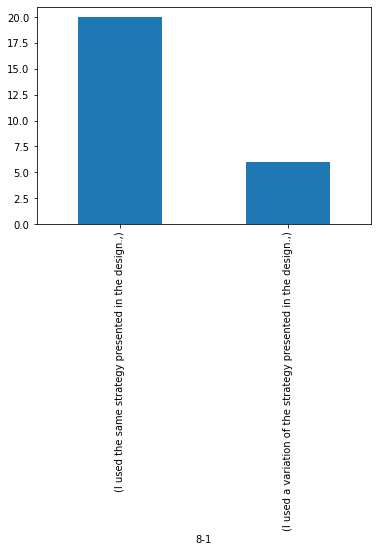

In [12]:
spassqual.T.value_counts().plot.bar()

In [13]:
spass = spass.drop(qualindex).fillna(0).astype(int)
spass.drop(attention.get('12'), inplace=True)

normqsid = ['3-1', '3-2', '3-3', '7-1']
normspass = 8 - spass.loc[normqsid]
spass.update(normspass)


# normalize scale 1 to 8 to scale -3 to 3
spass = spass - 4
spass.update(spass)

new_index = {}
for qsid in spass.index:
    # likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('12', qsid).replace("'", '"').split('\n')[1]).get('keyword')
new_index
spass = spass.rename(new_index)
spass['mean'] = spass.mean(axis=1)
spass['median'] = spass.median(axis=1)
spass['STD'] = spass.std(axis=1)

spass

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,mean,median,STD
Password Strength,2.0,2.0,3.0,1.0,2.0,-1.0,2.0,2.0,3.0,2.0,...,3.0,0.0,2.0,3.0,3.0,2.0,3.0,2.115385,2.0,0.955814
Motivation After Design,2.0,2.0,3.0,2.0,0.0,0.0,2.0,3.0,2.0,-1.0,...,3.0,1.0,3.0,3.0,3.0,2.0,2.0,1.961538,2.0,0.999314
Hard to Remember,3.0,0.0,-3.0,1.0,-2.0,1.0,2.0,-1.0,2.0,0.0,...,3.0,0.0,-1.0,-2.0,3.0,-3.0,-1.0,0.230769,0.0,1.770820
Guessed by Hacker,3.0,2.0,3.0,3.0,0.0,0.0,3.0,-2.0,3.0,2.0,...,3.0,1.0,2.0,3.0,3.0,-3.0,3.0,1.500000,2.0,1.931619
Guessed by FnF,3.0,2.0,3.0,3.0,-2.0,0.0,3.0,0.0,3.0,3.0,...,3.0,1.0,2.0,3.0,3.0,-2.0,3.0,1.538462,2.0,1.812170
Stronger than Usual,1.0,1.0,2.0,-1.0,3.0,-1.0,0.0,1.0,3.0,3.0,...,2.0,-1.0,2.0,3.0,3.0,2.0,3.0,1.461538,2.0,1.370876
Helpful,1.0,2.0,3.0,2.0,-1.0,-1.0,2.0,2.0,2.0,2.0,...,3.0,0.0,2.0,3.0,3.0,2.0,2.0,1.846154,2.0,1.043630
Easy to think memory,2.0,2.0,3.0,3.0,2.0,0.0,3.0,1.0,2.0,-1.0,...,3.0,0.0,0.0,3.0,3.0,2.0,1.0,1.846154,2.0,1.112346
Difficult for num&char,3.0,2.0,3.0,2.0,-1.0,0.0,-1.0,-3.0,2.0,2.0,...,-2.0,1.0,-1.0,3.0,3.0,-2.0,2.0,0.076923,0.0,1.980010


### Demographics

In [14]:
# demo = pd.DataFrame(survey_response_df['14'].to_dict())

# new_index = {}
# for qsid in demo.index:
#     new_index[qsid] = get_qdetails('14', qsid).split('\n')[0]

# demo = demo.rename(new_index).transpose()
# demo.head(5)


demo = pd.DataFrame(survey_response_df['14'].to_dict())

new_index = {}
for qsid in demo.index:
    new_index[qsid] = get_qdetails('14', qsid, 'keyword').split('\n')[0]

demo = demo.rename(new_index).transpose()
demo['race'] = demo['race'].str[0]


<AxesSubplot:xlabel='gender', ylabel='count'>

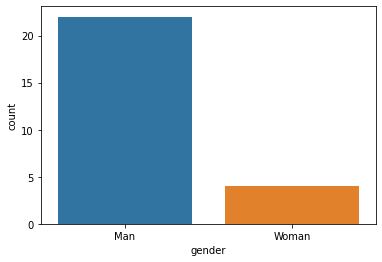

In [15]:
demo['gender'].value_counts()
sns.countplot(data=demo, x='gender', order=demo.gender.value_counts().index)

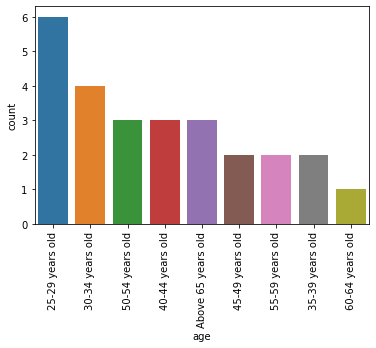

In [16]:
demo['age'].value_counts()
ax = sns.countplot(data=demo, x='age', order=demo.age.value_counts().index)
ax.tick_params(axis='x', rotation=90)


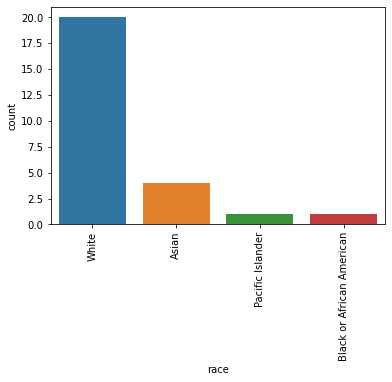

In [17]:
demo['race'].value_counts()
ax = sns.countplot(data=demo, x='race', order=demo.race.value_counts().index)
ax.tick_params(axis='x', rotation=90)
